In [42]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import math
import sys
from pathlib import Path
import seaborn as sns

# Add 'src' to the system path
sys.path.append(str(Path().resolve() / 'src'))
from src.data.process_data import *
from src.data.clean_data import *

IMPORTANT: these scripts/functions assume you have the following files in the data/raw directory:
- From the CMU dataset: 
    - movie.metadata.tsv
    - plot_summaries.txt
- From the TMDB dataset: 
    - TMDB_movie_dataset_v11.csv

AND have data/processed folder created

Note: download CMU dataset here: https://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz
and TMDB dataset here (Download button): https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies

In [43]:
# from raw files, creates clean datafiles
%run src/data/clean_data.py

sep ,
headers []
original df shape (1128267, 24)
after status (1102948, 24)
after release date (760344, 24)
after release year (760344, 25)
after duplicates (745991, 25)
after numeric columns (745990, 25)
after select columns (745990, 13)
sep 	
headers ['wikipedia_movie_id', 'freebase_ID', 'title', 'release_year', 'revenue', 'runtime', 'languages', 'countries', 'genres']
original df shape (81740, 9)
after status (81740, 9)
after release date (81740, 9)
after release year (44006, 9)
after duplicates (43915, 9)
after numeric columns (43915, 9)
after select columns (43915, 5)


In [44]:
# from clean data files, creates a dataframe with CMU + plots & TMDB movies 
df_combined = create_cmu_tmdb_dataset('data/processed/movies.csv','data/processed/plot_summaries.csv', 'data/processed/TMDB_clean.csv', 'inner')

In [45]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430322 entries, 0 to 745989
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   release_year          430322 non-null  int64 
 1   summary               363931 non-null  object
 2   release_date          430322 non-null  object
 3   budget                430322 non-null  int64 
 4   original_language     430322 non-null  object
 5   overview              363931 non-null  object
 6   genres                430322 non-null  object
 7   production_companies  430322 non-null  object
 8   production_countries  430322 non-null  object
 9   spoken_languages      430322 non-null  object
 10  keywords              430322 non-null  object
 11  title                 430319 non-null  object
 12  runtime               430322 non-null  int64 
 13  revenue               430322 non-null  int64 
 14  dvd_era               430322 non-null  object
dtypes: int64(4), object(11

In [46]:
df_combined.head()

,release_year,summary,release_date,budget,original_language,overview,genres,production_companies,production_countries,spoken_languages,keywords,title,runtime,revenue,dvd_era
0,1987,A series of murders of rich young women throug...,1987-06-19,0,en,"In a wealthy and isolated desert community, a ...","[Horror, Thriller]",[Mrs. White's Productions],[United Kingdom],[English],"[based on novel or book, gas station, psychopa...",White Of The EyeWhite of the Eye,221,0,pre
1,1983,"Eva, an upper class housewife, becomes frustra...",1983-05-11,0,de,"Eva, an upper-class housewife, frustratedly le...",[Drama],[Dieter Geissler Filmproduktion],[Germany],[German],"[jealousy, eroticism, gigolo, longing, dominat...",A Woman in FlamesA Woman in Flames,212,0,pre
2,2002,"Every hundred years, the evil Morgana returns...",2002-04-12,0,en,"Every hundred years, the evil sorceress Morgan...","[Adventure, Family, Fantasy]","[Peakviewing Productions, Peakviewing Transatl...",[United Kingdom],"[French, English]",[morgana],The Sorcerer's ApprenticeThe Sorcerer's Appren...,172,0,during
3,1997,"Adam, a San Francisco-based artist who works a...",1997-04-04,0,en,Best friends Adam and Kevin have a lot in comm...,"[Comedy, Romance]","[Bandeira Entertainment, Miramax]",[],[English],[],Little cityLittle City,183,0,pre
4,1989,{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,1989-10-05,9000000,en,Gritty adaption of William Shakespeare's play ...,"[War, Drama, History]","[BBC Film, Renaissance Films, Samuel Goldwyn C...",[United Kingdom],[English],"[france, kingdom, theater play, based on true ...",Henry VHenry V,274,20337800,pre


In [47]:
df_combined[df_combined['production_companies'] == 'Marvel Studios']

,release_year,summary,release_date,budget,original_language,overview,genres,production_companies,production_countries,spoken_languages,keywords,title,runtime,revenue,dvd_era


In [48]:
# Use str.contains() to find 'Marvel' anywhere in the production_companies column
prod_companies = df_combined['production_companies'].explode().value_counts().head(100).tolist()
# sns.histplot(data=prod_companies)

# str.contains([Mrs. White's Productions], case=False, na=False)]

In [49]:
df_combined['production_companies'].head()

0                           [Mrs. White's Productions]
1                     [Dieter Geissler Filmproduktion]
2    [Peakviewing Productions, Peakviewing Transatl...
3                    [Bandeira Entertainment, Miramax]
4    [BBC Film, Renaissance Films, Samuel Goldwyn C...
Name: production_companies, dtype: object

In [118]:
empty_genre_mask = df_combined['genres'].apply(lambda x: isinstance(x, list) and len(x) == 0)
df_no_empty_genre = df_combined[empty_genre_mask]
df_no_empty_genre['production_companies'].explode().value_counts().describe()

count    10055.000000
mean         6.006067
std         39.476761
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       2129.000000
Name: count, dtype: float64

In [119]:
df_no_empty_genre = df_no_empty_genre.explode('production_companies')

In [120]:
df_no_empty_genre[df_no_empty_genre['production_companies'] == 'Lionsgate']

,release_year,summary,release_date,budget,original_language,overview,genres,production_companies,production_countries,spoken_languages,keywords,title,runtime,revenue,dvd_era
258542,2012,The engines on the Island of Sodor find themse...,2012-12-11,0,en,The engines on the Island of Sodor find themse...,[],Lionsgate,[],[],[],Thomas & Friends: Sticky Situations,51,0,post
404868,2019,Luni is worried about the party that his frien...,2019-05-10,0,en,Luni is worried about the party that his frien...,[],Lionsgate,[United States of America],[],[],The Gacha Life Movie,108,0,post
734653,2013,Get the hot healthy body you've always wanted ...,2013-09-03,0,en,Get the hot healthy body you've always wanted ...,[],Lionsgate,[],[English],[],Jillian Michaels: Yoga Inferno,70,0,post


In [115]:
x_companies = df_no_empty_genre['production_companies'].explode().value_counts()
x_companies = x_companies[x_companies == 3]
x_companies.head(30)

production_companies
Anstoß                                  3
Beyond Wrestling                        3
Univers Doll's                          3
Contents On Media                       3
VARA                                    3
MJP                                     3
Biola University                        3
优酷                                      3
Lionsgate                               3
Beofilm                                 3
China Film Group Corporation            3
Maiko Pictures                          3
Sudden Impact                           3
HBO                                     3
PBS                                     3
ZDF/Arte                                3
LeoLulu                                 3
Devotion XXX                            3
Other Trash                             3
Geetha Arts                             3
NBC                                     3
Royal College of Art                    3
Program 33                              3
Bad and Class

production_companies
Evil Angel         2129
Naughty America     918
Reality Kings       878
New Sensations      839
Name: count, dtype: int64

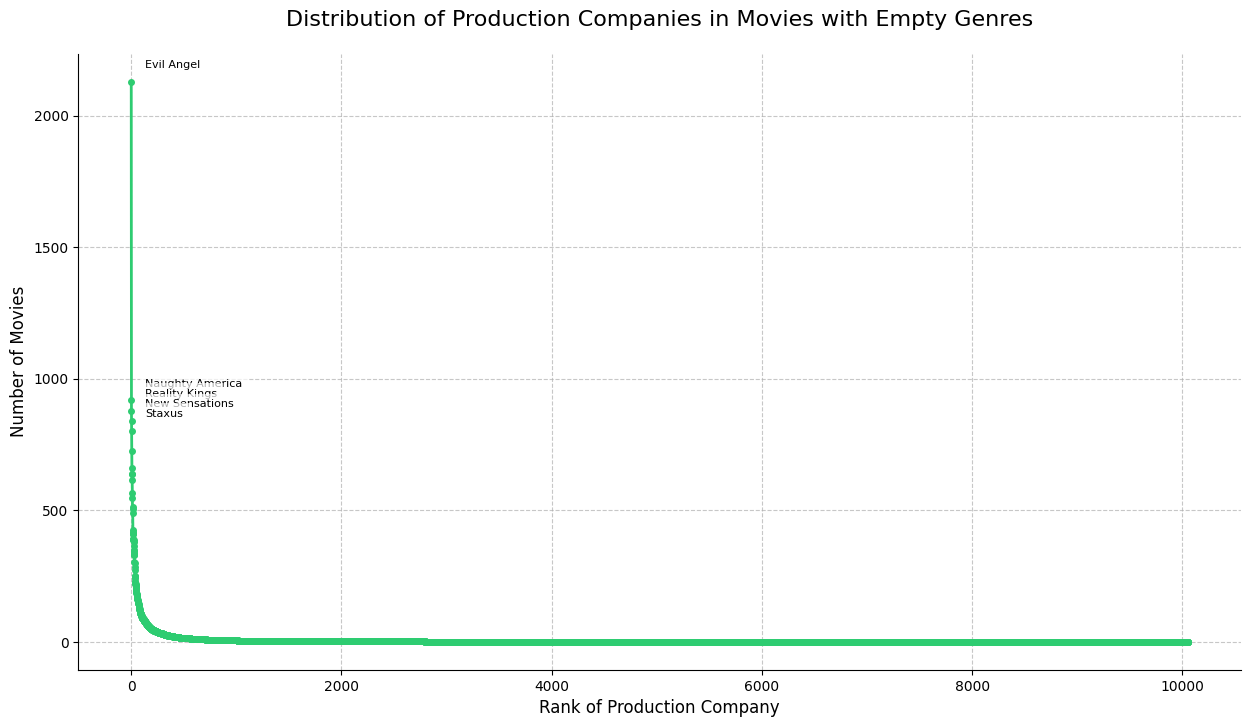

In [76]:
# Get the value counts
top_100_companies = df_filtered[empty_genres_mask]['production_companies'].explode().value_counts()

# Create figure with larger size
plt.figure(figsize=(15, 8))

# Create line plot with improved styling
plt.plot(range(len(top_100_companies)), 
         top_100_companies.values, 
         linewidth=2, 
         marker='o',
         markersize=4,
         color='#2ecc71')

# Customize the plot
plt.title('Distribution of Production Companies in Movies with Empty Genres', 
          fontsize=16, 
          pad=20)
plt.xlabel('Rank of Production Company', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Remove top and right spines
sns.despine()

# Add some annotations for the top companies
for i in range(5):  # Annotate top 5
    plt.annotate(f'{top_100_companies.index[i]}',
                xy=(i, top_100_companies.values[i]),
                xytext=(10, 10),
                textcoords='offset points',
                fontsize=8,
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))




/var/folders/3q/hzh268rx169fgmsptrb9rzzm0000gn/T/ipykernel_2284/936445612.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


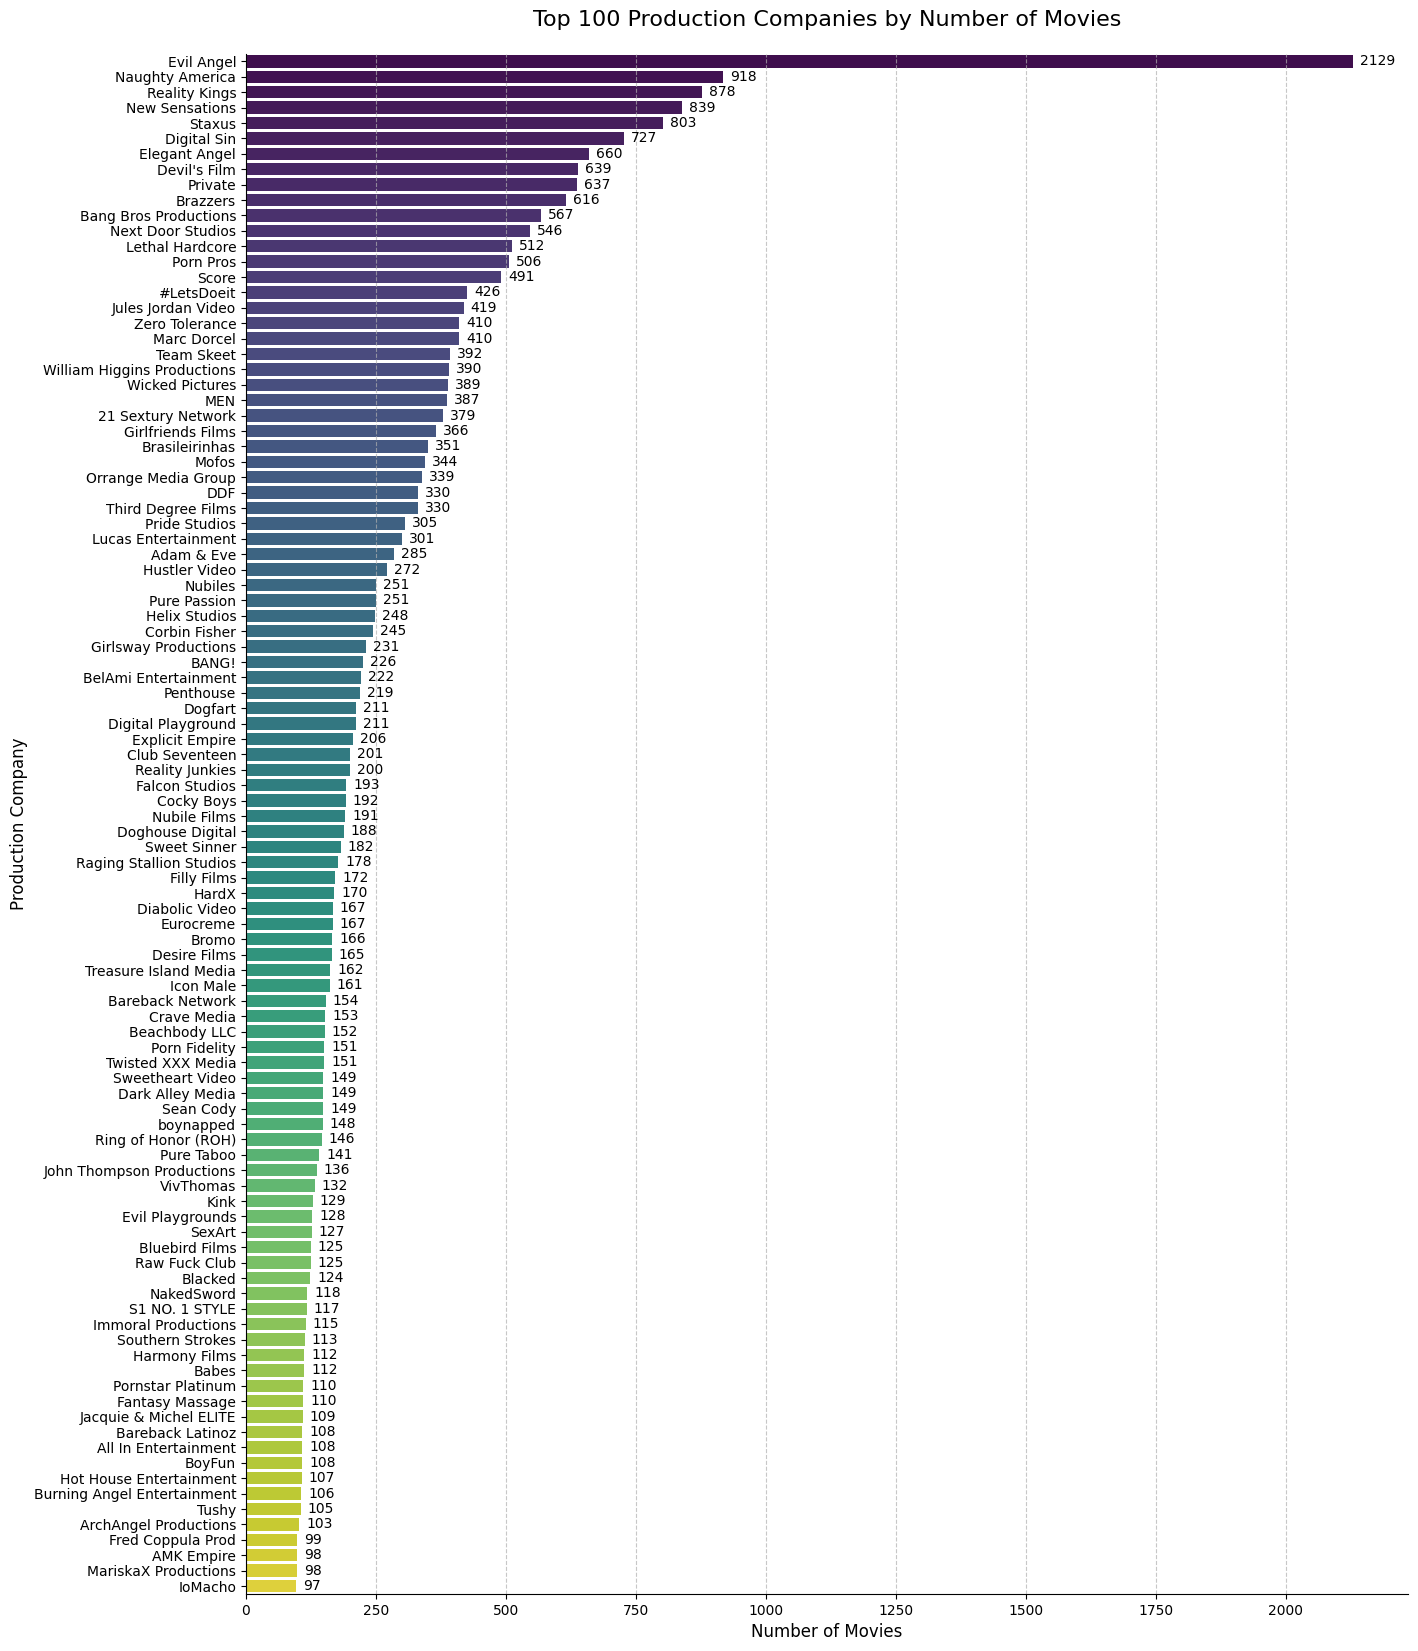

In [92]:
# Get top 100 production companies
top_100_companies = df_filtered[empty_genres_mask]['production_companies'].explode().value_counts().head(100)


# Create figure with larger size
plt.figure(figsize=(15, 20))

# Create horizontal bar plot with improved styling
ax = sns.barplot(
    y=top_100_companies.index,
    x=top_100_companies.values,
    palette='viridis'  # Use a nice color palette
)

# Customize the plot
plt.title('Top 100 Production Companies by Number of Movies', 
          fontsize=16, 
          pad=20)
plt.xlabel('Number of Movies', fontsize=12)
plt.ylabel('Production Company', fontsize=12)

# Add value labels on the bars
for i in ax.containers:
    ax.bar_label(i, padding=5)

# Adjust grid for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Remove top and right spines
sns.despine()



In [54]:
filtered_names = pd.read_csv('data/Filtered_Names.csv')
filtered_list = filtered_names['Name'].tolist()
